The columns following the happiness score estimate the extent to which each of six factors – economic production, social support, life expectancy, freedom, absence of corruption, and generosity – contribute to making life evaluations higher in each country than they are in Dystopia, a hypothetical country that has values equal to the world’s lowest national averages for each of the six factors. They have no impact on the total score reported for each country, but they do explain why some countries rank higher than others.

In [239]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint


In [240]:
# Read CSV 
data_2015 = pd.read_csv("2015.csv")
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [241]:
# Read CSV
data_2016 = pd.read_csv("2016.csv")
data_2016.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [242]:
# Read CSV
data_2017 = pd.read_csv("2017.csv")
data_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [243]:
# Read CSV
data_2018 = pd.read_csv("2018.csv")
data_2018.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [244]:
# Read CSV
data_2019 = pd.read_csv("2019.csv")
data_2019.head(10)
data_2019.tail(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
146,147,Haiti,3.597,0.323,0.688,0.449,0.026,0.419,0.110
147,148,Botswana,3.488,1.041,1.145,0.538,0.455,0.025,0.100
148,149,Syria,3.462,0.619,0.378,0.440,0.013,0.331,0.141
149,150,Malawi,3.410,0.191,0.560,0.495,0.443,0.218,0.089
150,151,Yemen,3.380,0.287,1.163,0.463,0.143,0.108,0.077
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


In [245]:
avr_happy_score = data_2019['Score'].mean()
top_half_2019 = data_2019[data_2019['Score']>=avr_happy_score]

print(avr_happy_score)
top_half_2019.shape

5.407096153846153


(77, 9)

In [246]:
bottom_half_2019 = data_2019[data_2019['Score']< avr_happy_score]

top_half_2019['Score'].count()
bottom_half_2019['Score'].count()

79

In [247]:
# Pie Chart

# Labels for the sections of our pie chart
labels = ["% Countries Above Avarage", "% Countries Below Average"]

# The values of each section of the pie chart
sizes = [top_half_2019['Score'].count(), bottom_half_2019['Score'].count()]

# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.2, 0.2)

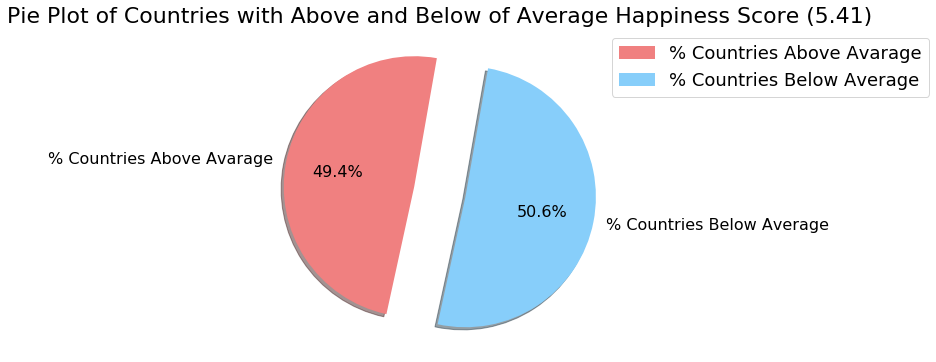

In [248]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart

fig = plt.figure(1, figsize=(6,6))

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=80, textprops={'fontsize': 16})

# Decoration
plt.title('Pie Plot of Countries with Above and Below of Average Happiness Score (5.41)', fontsize=22)

plt.legend(bbox_to_anchor=(1, 1), fontsize=18)
plt.show()

In [249]:
# Function to create Linear Regression plots

def linearRegrassionPlot(x_values, y_values, title, xlabel , ylabel, fileName = ''):

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept

        line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

        plt.scatter(x_values,y_values, marker="o", facecolors="b", edgecolors="r", alpha=0.55)
        plt.plot(x_values,regress_values,"r-")
        
        # Creating an extra space on the plot for the equation of the regression line
        plt.annotate(line_eq,(x_values.min() , y_values.max()+ 0.05 * y_values.max()),fontsize=14,color="red")

        # To change the size of your pie chart/figure
        fig = plt.gcf()
        fig.set_size_inches(8,5)

        # Creating a title, x label, and y label 
        plt.title(title, fontsize=18, color='purple', alpha=0.85)
        plt.xlabel(xlabel, fontsize=16)
        plt.ylabel(ylabel, fontsize=16)

        # Create x limits of our scatter plot 
        if x_values.max() > 0:
            plt.xlim(x_values.min() - np.absolute(x_values.min() -0.1), x_values.max() + 0.1 * x_values.max())
        else:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()), x_values.max() - 0.05 * x_values.max())

        # Create y limits of our scatter plot
        if y_values.max() > 0:
            plt.ylim(y_values.min() - np.absolute(0.1 * y_values.min()), y_values.max() + 0.1 * y_values.max() )
        else:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() - 0.10 * y_values.max() + 5)

        print(f"The r-squared is: {rvalue}")
        print(f"The equation of the regression line is: {line_eq}")
        print(f"The p-value is: {pvalue}")

        # Save the plotted figures as .pngs
        plt.savefig(fileName + '.png')

        plt.grid()
        plt.show()

The r-squared is: 0.7938828678781276
The equation of the regression line is: y = 2.22x + 3.4
The p-value is: 4.31548091331933e-35


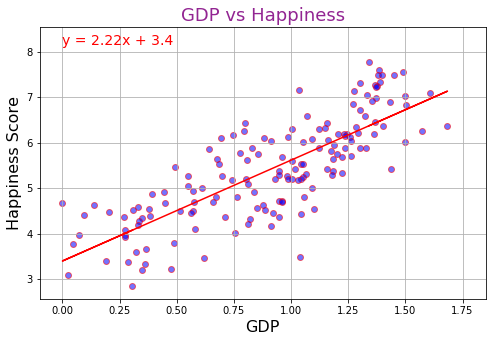

In [250]:
# GDP per capita
linearRegrassionPlot(data_2019['GDP per capita'], data_2019['Score'], 'GDP vs Happiness', 'GDP', 'Happiness Score', 'GDP_vs_Happiness')

                    

In [251]:
# Read CSV
data_density = pd.read_csv("population-density.csv")
data_density_2017 = data_density.loc[data_density['Year'] == 2017]
data_density_2017 = data_density_2017.reset_index(drop = True)
print(data_density_2017.shape)

data_density_2017.head()

(261, 4)


,Entity,Code,Year,Population density (people per sq. km of land area) (people per km² of land area)
0,Afghanistan,AFG,2017,54.422205
1,Albania,ALB,2017,104.870693
2,Algeria,DZA,2017,17.347874
3,American Samoa,ASM,2017,278.205000
4,Andorra,AND,2017,163.755319


In [252]:
data_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [253]:
# Merging happy_data and density_data for 2017
happy_density_2017 = data_2017.merge(data_density_2017, left_on='Country', right_on='Entity', how='inner')
happy_density_2017 = happy_density_2017.reset_index(drop = True)
happy_density_2017.shape

(146, 16)

In [254]:
# Happiness Rank vs Population Density
# Creating a rank for the density with df.rank()

happy_density_2017["Population Density Rank"] = happy_density_2017["Population density (people per sq. km of land area) (people per km² of land area)"].rank(method='first')  
happy_density_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Entity,Code,Year,Population density (people per sq. km of land area) (people per km² of land area),Population Density Rank
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Norway,NOR,2017,14.462136,16.0
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Denmark,DNK,2017,136.519876,106.0
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Iceland,ISL,2017,3.404329,4.0
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Switzerland,CHE,2017,214.242762,118.0
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Finland,FIN,2017,18.135848,24.0


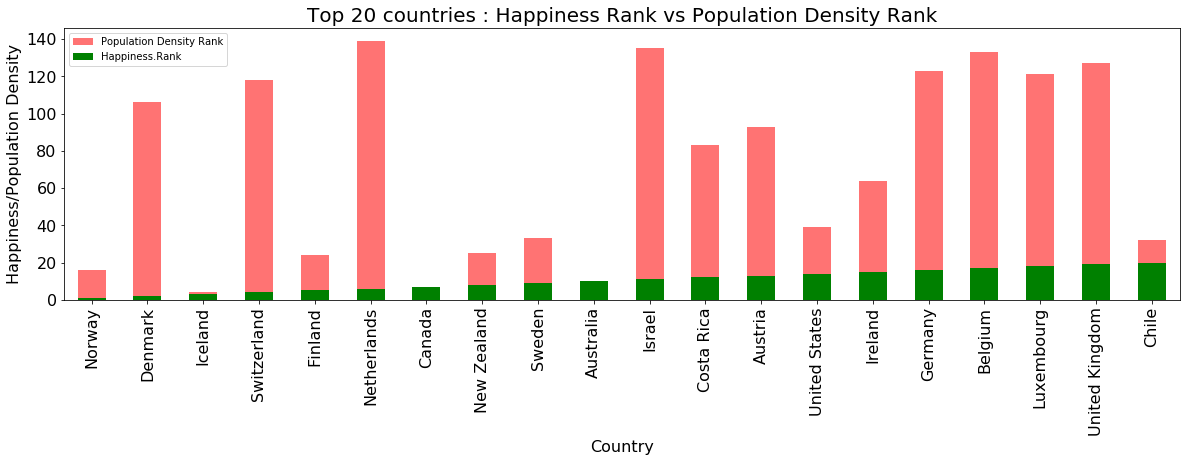

In [255]:
# Set x axis and tick locations
x_axis = np.arange(len(happy_density_2017[0:20]))
tick_locations = [value for value in x_axis]


_, ax = plt.subplots()
happy_density_2017['Population Density Rank'][0:20].plot(kind='bar', ax=ax , color='red',  alpha=0.55, figsize=(20,5), legend = 'Population Density',  fontsize=16)
happy_density_2017['Happiness.Rank'][0:20].plot(kind='bar', ax=ax, color='green', legend = 'Happiness Rank',  fontsize=16)
plt.xticks(tick_locations, happy_density_2017["Country"], rotation="vertical")

title='Top 20 countries : Happiness Rank vs Population Density Rank'
xlabel='Country'
ylabel='Happiness/Population Density'

ax.xtiks = happy_density_2017['Country']

plt.title(title, fontsize=20)
plt.xlabel(xlabel, fontsize=16)
plt.ylabel(ylabel, fontsize=16)
# ax.grid()

# # Create a legend for our chart
# plt.legend(handles=[Population_Density, Happiness_Rank], loc="best")

plt.show()


In [256]:
# Function to create Linear Regression plots

def linearRegrassionPlot(x_values, y_values, title, xlabel , ylabel, fileName = ''):

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept

        line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

        plt.scatter(x_values,y_values, marker="o", facecolors="b", edgecolors="r", alpha=0.55)
        plt.plot(x_values,regress_values,"r-")
        
        # Creating an extra space on the plot for the equation of the regression line
        plt.annotate(line_eq,(x_values.min() , y_values.max()+ 0.05 * y_values.max()),fontsize=14,color="red")

        # To change the size of your pie chart/figure
        fig = plt.gcf()
        fig.set_size_inches(8,4)

        # Creating a title, x label, and y label 
        plt.title(title, fontsize=18, color='purple', alpha=0.85)
        plt.xlabel(xlabel, fontsize=16)
        plt.ylabel(ylabel, fontsize=16)

        # Create x limits of our scatter plot 
        if x_values.max() > 0:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() + 0.05 * x_values.max() + 5)
        else:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() - 0.05 * x_values.max() + 5)

        # Create y limits of our scatter plot
        if y_values.max() > 0:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() + 0.10 * y_values.max() + 5)
        else:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() - 0.10 * y_values.max() + 5)

        print(f"The r-squared is: {rvalue}")
        print(f"The equation of the regression line is: {line_eq}")
        print(f"The p-value is: {pvalue}")

        # Save the plotted figures as .pngs
        plt.savefig(fileName + '.png')

        plt.grid()
        plt.show()

The r-squared is: -0.07282635578685366
The equation of the regression line is: y = -0.08x + 81.99
The p-value is: 0.3823573051743563


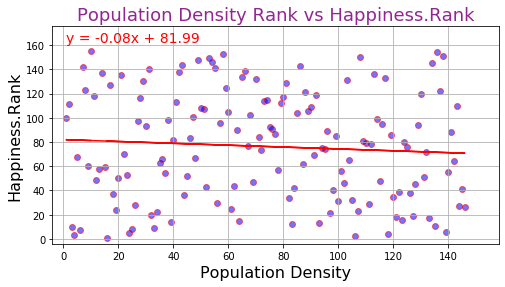

In [257]:
linearRegrassionPlot(happy_density_2017["Population Density Rank"] ,happy_density_2017["Happiness.Rank"], 'Population Density Rank vs Happiness.Rank', 'Population Density', 'Happiness.Rank')
                


The index published here presents a broad measure of human freedom, understood as the absence of coercive constraint. This fifth annual index uses 76 distinct indicators of personal and economic freedom in the following areas:

Rule of Law
Security and Safety
Movement
Religion
Association, Assembly, and Civil Society
Expression and Information
Identity and Relationships
Size of Government
Legal System and Property Rights
Access to Sound Money
Freedom to Trade Internationally
Regulation of Credit, Labor, and Business

In [258]:
# The Human Freedom Index - 2019
freedom_2017 = pd.read_csv("human-freedom-index-2019.csv")
data_2017.head()


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [259]:
freedom_2017.head()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,...,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38,1,6.7,4.5,4.7,...,6.3,6.7,9.7,4.1,6,7.2,6.7,7.8,7.67,30
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155,4,-,-,-,...,3.7,1.8,9.3,3.8,8.7,7,5.7,5.4,4.77,159
2,2017,AGO,Angola,Sub-Saharan Africa,5.4,151,4,-,-,-,...,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158
3,2017,ARG,Argentina,Latin America & the Caribbean,6.86,77,2,7.1,5.8,4.3,...,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147
4,2017,ARM,Armenia,Caucasus & Central Asia,7.42,54,2,-,-,-,...,4.6,6.2,9.9,4.6,9.3,7.1,6.9,7.5,7.7,27


In [260]:
freedom_2017 = freedom_2017.loc[freedom_2017['year'] == 2017]
freedom_2017 = freedom_2017.reset_index(drop = True)



In [261]:
freedom_2017 = freedom_2017[['countries', 'ef_rank']]
freedom_2017.head()

,countries,ef_rank
0,Albania,30
1,Algeria,159
2,Angola,158
3,Argentina,147
4,Armenia,27


In [262]:
happy_freedom_2017 = data_2017.merge(freedom_2017, left_on = 'Country', right_on = 'countries', how = 'inner')
happy_freedom_2017['ef_rank'] = happy_freedom_2017['ef_rank'].astype(float)
happy_freedom_2017.head()


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,countries,ef_rank
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Norway,32.0
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Denmark,13.0
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Iceland,23.0
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Switzerland,4.0
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Finland,21.0


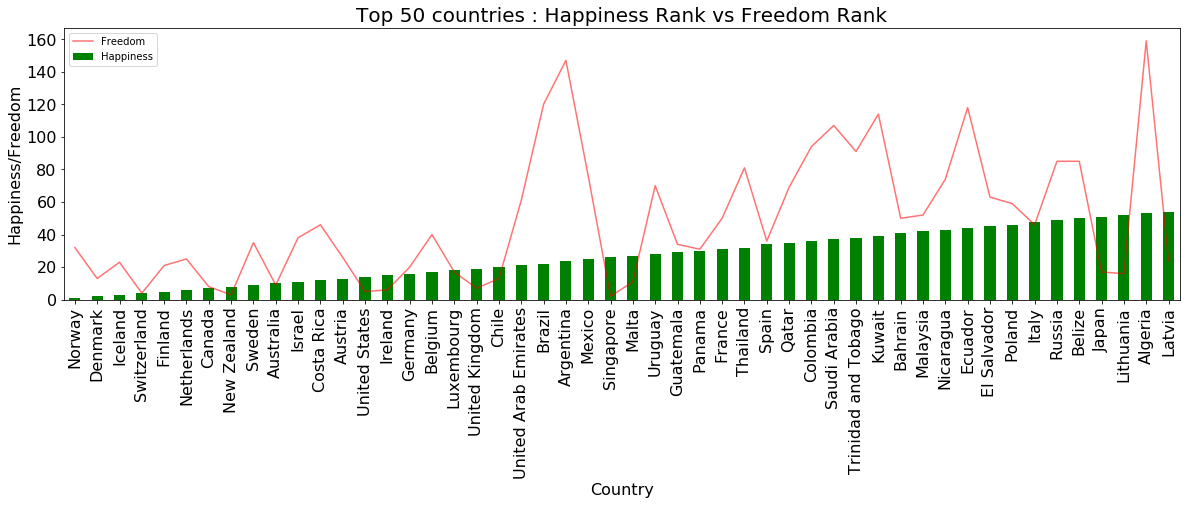

In [264]:
# Set x axis and tick locations
x_axis = np.arange(len(happy_freedom_2017[0:50]))
tick_locations = [value for value in x_axis]


_, ax = plt.subplots()
happy_freedom_2017['ef_rank'][0:50].plot(kind='bar', ax=ax , color='red',  alpha=0.55, figsize=(20,5), legend = 'Freedom',  fontsize=16)
happy_freedom_2017['Happiness.Rank'][0:50].plot(kind='bar', ax=ax, color='green', legend = 'Happiness',  fontsize=16)
plt.xticks(tick_locations, happy_freedom_2017["Country"], rotation="vertical")

title='Top 50 countries : Happiness Rank vs Freedom Rank'
xlabel='Country'
ylabel='Happiness/Freedom'

ax.xtiks = happy_freedom_2017['Country']

plt.title(title, fontsize=20)
plt.xlabel(xlabel, fontsize=16)
plt.ylabel(ylabel, fontsize=16)
# ax.grid()

# # Create a legend for our chart
plt.legend(['Freedom', 'Happiness'])


plt.show()


The r-squared is: 0.6090686158010536
The equation of the regression line is: y = 0.58x + 29.84
The p-value is: 5.799447698240429e-15


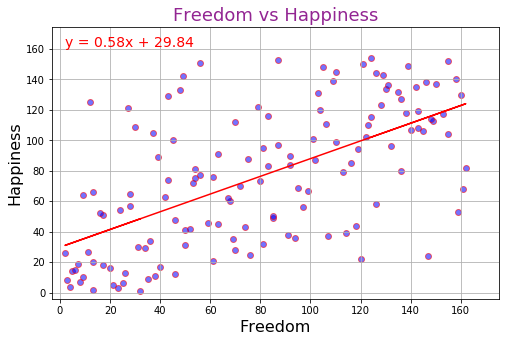

In [455]:
linearRegrassionPlot(happy_freedom_2017["ef_rank"] ,happy_freedom_2017["Happiness.Rank"], 'Freedom vs Happiness', 'Freedom', 'Happiness')
                


In [265]:
data_2017.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


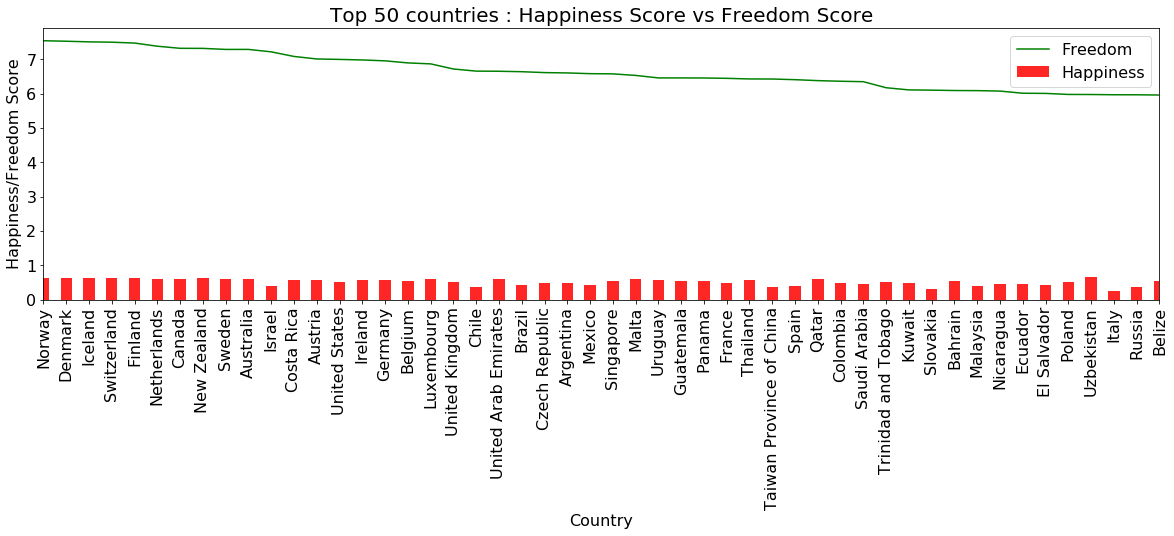

In [287]:

# Set x axis and tick locations
x_axis = np.arange(len(data_2017[0:50]))
tick_locations = [value for value in x_axis]


_, ax = plt.subplots()
data_2017['Freedom'][0:50].plot(kind='bar', ax=ax , color='red',  alpha=0.85, figsize=(20,5), legend = 'Freedom',  fontsize=16)
data_2017['Happiness.Score'][0:50].plot(kind='line', ax=ax, color='green', legend = 'Happiness',  fontsize=16)
plt.xticks(tick_locations, data_2017["Country"], rotation="vertical")

title='Top 50 countries : Happiness Score vs Freedom Score'
xlabel='Country'
ylabel='Happiness/Freedom Score'

ax.xtiks = data_2017['Country']

plt.title(title, fontsize=20)
plt.xlabel(xlabel, fontsize=16)
plt.ylabel(ylabel, fontsize=16)
# ax.grid()

# # Create a legend for our chart
plt.legend(['Freedom', 'Happiness'],fontsize=16 )


plt.show()


In [284]:
# Function to create Linear Regression plots

def linearRegrassionPlot(x_values, y_values, title, xlabel , ylabel, fileName):

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept

        line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

        plt.scatter(x_values,y_values, marker="o", facecolors="b", edgecolors="r", alpha=0.55)
        plt.plot(x_values,regress_values,"r-")
        
        # Creating an extra space on the plot for the equation of the regression line
        plt.annotate(line_eq,(x_values.min() , y_values.max()+ 0.05 * y_values.max()),fontsize=14,color="red")

        # To change the size of your pie chart/figure
        fig = plt.gcf()
        fig.set_size_inches(8,4)

        # Creating a title, x label, and y label 
        plt.title(title, fontsize=18, color='purple', alpha=0.85)
        plt.xlabel(xlabel, fontsize=16)
        plt.ylabel(ylabel, fontsize=16)

        # Create x limits of our scatter plot 
        if x_values.max() > 0:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()-0.05), x_values.max() + 0.05 * x_values.max())
        else:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) , x_values.max() - 0.05 * x_values.max())

        # Create y limits of our scatter plot
        if y_values.max() > 0:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min() ) , y_values.max() + 0.10 * y_values.max())
        else:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) , y_values.max() - 0.10 * y_values.max())

        print(f"The r-squared is: {rvalue}")
        print(f"The equation of the regression line is: {line_eq}")
        print(f"The p-value is: {pvalue}")

        # Save the plotted figures as .pngs
        plt.savefig(fileName + '.png')

        plt.grid()
        plt.show()

The r-squared is: 0.5701371935975071
The equation of the regression line is: y = 4.3x + 3.6
The p-value is: 9.687898897859464e-15


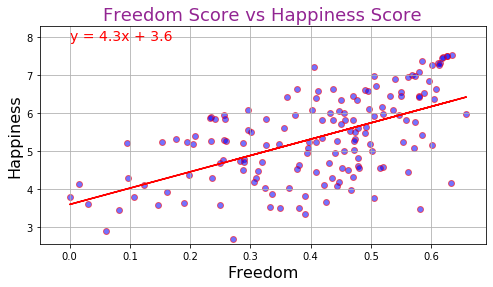

In [282]:
linearRegrassionPlot(data_2017["Freedom"] ,data_2017["Happiness.Score"], 'Freedom Score vs Happiness Score', 'Freedom', 'Happiness', 'Freedom Score vs Happiness Score')
                


In [456]:
# Read CSV
happy_2017 = pd.read_csv("2017.csv")
happy_2017[happy_2017['Country']=='Costa Rica']


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
11,Costa Rica,12,7.079,7.168112,6.989888,1.109706,1.416404,0.759509,0.580132,0.214613,0.100107,2.898639


In [457]:
import os
import folium
import webbrowser
import branca.colormap as cm

linear = cm.LinearColormap(['green','yellow','red'], vmin=1., vmax=200.)
linear

In [458]:
import os
import folium
import webbrowser

# Load the shape of the zone (US states)
# Find the original file here: https://github.com/python-visualization/folium/tree/master/examples/data
# You have to download this file and set the directory where you saved it
country_geo = os.path.join('world-countries.json')



# Initialize the map:
map = folium.Map(location=[48.85, 2.35], tiles="OpenStreetMap", zoom_start=2)

# Add the color for the chloropleth:
map.choropleth(
 geo_data=country_geo,
 name='Happiness',
 data=happy_2017,
 columns=['Country','Happiness.Rank'],
 key_on='feature.properties.name',
 fill_color='Paired', 
    fill_opacity=0.7, line_opacity=0.2,
 legend_name='Happiness (%)'
)

 
map.save('plot_data.html')
# Import the Folium interactive html file


from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

In [459]:
df = pd.read_csv("2017.csv")

print(df['Family'].max())
df.head()

1.6105740070343


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


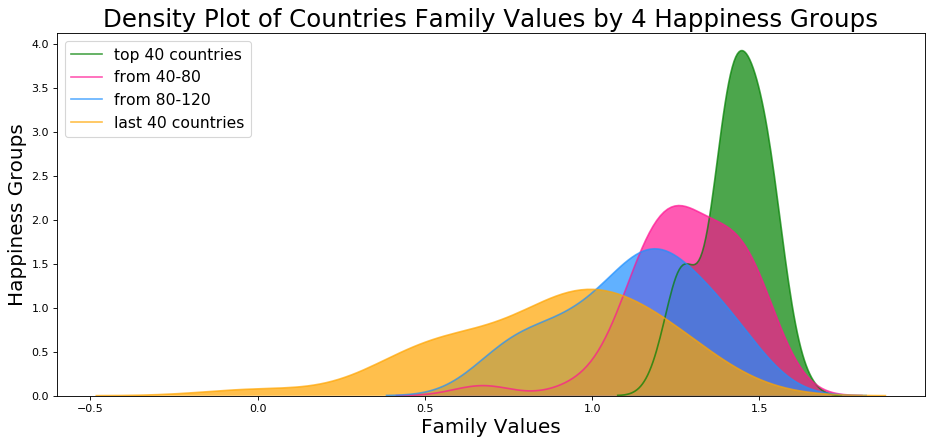

In [460]:
#  Density Plot
df = pd.read_csv("2017.csv")

# Draw Plot
plt.figure(figsize=(14,6), dpi= 80)
sns.kdeplot(df.loc[df['Happiness.Rank'] <= 40, "Family"], shade=True, color="g", label="top 40 countries", alpha=.7)
sns.kdeplot(df.loc[(df['Happiness.Rank'] <=80) & (df['Happiness.Rank'] > 40), "Family"], shade=True, color="deeppink", label="from 40-80", alpha=.7)
sns.kdeplot(df.loc[(df['Happiness.Rank'] <= 120) & (df['Happiness.Rank'] > 80), "Family"], shade=True, color="dodgerblue", label="from 80-120", alpha=.7)
sns.kdeplot(df.loc[df['Happiness.Rank'] > 120, "Family"], shade=True, color="orange", label="last 40 countries", alpha=.7)

# Decoration
plt.title('Density Plot of Countries Family Values by 4 Happiness Groups', fontsize=22)
plt.xlabel('Family Values', fontsize=18)
plt.ylabel('Happiness Groups', fontsize=18)
plt.legend(fontsize=14)
plt.show()

In [461]:
# Function to create Linear Regression plots

def linearRegrassionPlot(x_values, y_values, title, xlabel , ylabel, fileName = ''):

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept

        line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

        plt.scatter(x_values,y_values, marker="o", facecolors="b", edgecolors="r", alpha=0.55)
        plt.plot(x_values,regress_values,"r-")
        
        # Creating an extra space on the plot for the equation of the regression line
        plt.annotate(line_eq,(x_values.min() , y_values.max()+ 0.05 * y_values.max()),fontsize=14,color="red")

        # To change the size of your pie chart/figure
        fig = plt.gcf()
        fig.set_size_inches(8,5)

        # Creating a title, x label, and y label 
        plt.title(title, fontsize=18, color='purple', alpha=0.85)
        plt.xlabel(xlabel, fontsize=16)
        plt.ylabel(ylabel, fontsize=16)

        # Create x limits of our scatter plot 
        if x_values.max() > 0:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()-0.1), x_values.max() + 0.05 * x_values.max())
        else:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() - 0.05 * x_values.max() + 5)

        # Create y limits of our scatter plot
        if y_values.max() > 0:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()-1.1) , y_values.max() + 0.10 * y_values.max())
        else:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() - 0.10 * y_values.max() + 5)

        print(f"The r-squared is: {rvalue}")
        print(f"The equation of the regression line is: {line_eq}")
        print(f"The p-value is: {pvalue}")

        # Save the plotted figures as .pngs
        plt.savefig(fileName + '.png')

        plt.grid()
        plt.show()

The r-squared is: 0.7423109555885221
The equation of the regression line is: y = 2.98x + 1.81
The p-value is: 8.109320834658085e-27


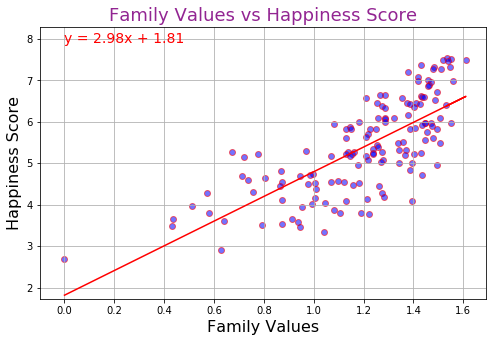

In [462]:
linearRegrassionPlot(happy_density_2017["Family"] ,happy_density_2017["Happiness.Score"], 'Family Values vs Happiness Score', 'Family Values', 'Happiness Score')
                


In [426]:
# Heatmaps with Seaborn
import seaborn as sns
%matplotlib inline

data = pd.read_csv("2018.csv")

data.head()



,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


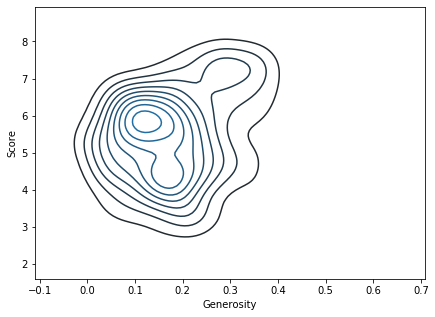

In [273]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)


sns.kdeplot(data["Generosity"],data["Score"])
plt.show()
# Cool, we have a contour plot, which groups lines closer to eachother where we have more density in our data.

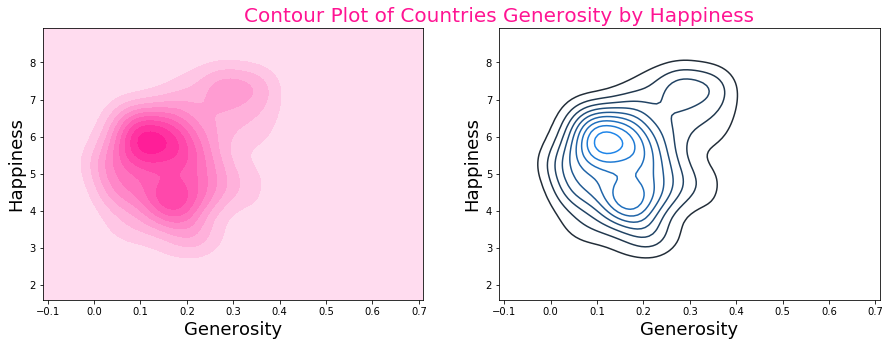

In [292]:
fig, ax = plt.subplots()
fig.set_size_inches(15,5)

#Plot one - include shade
plt.subplot(121)
sns.kdeplot(data["Generosity"],data["Score"], shade="True",color="deeppink" )
plt.xlabel('Generosity', fontsize=18)
plt.ylabel('Happiness', fontsize=18)


#Plot two - no shade, lines only
plt.subplot(122)
sns.kdeplot(data["Generosity"],data["Score"], color="dodgerblue")
plt.xlabel('Generosity', fontsize=18)
plt.ylabel('Happiness', fontsize=18)


# Decoration
plt.title('Contour Plot of Countries Generosity by Happiness', fontsize=20, x=0, color="deeppink")

plt.show()

In [467]:
# Function to create Linear Regression plots

def linearRegrassionPlot(x_values, y_values, title, xlabel , ylabel, fileName = ''):

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept

        line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

        plt.scatter(x_values,y_values, marker="o", facecolors="b", edgecolors="r", alpha=0.55)
        plt.plot(x_values,regress_values,"r-")
        
        # Creating an extra space on the plot for the equation of the regression line
        plt.annotate(line_eq,(x_values.min() , y_values.max()+ 0.05 * y_values.max()),fontsize=14,color="red")

        # To change the size of your pie chart/figure
        fig = plt.gcf()
        fig.set_size_inches(8,5)

        # Creating a title, x label, and y label 
        plt.title(title, fontsize=18, color='purple', alpha=0.85)
        plt.xlabel(xlabel, fontsize=16)
        plt.ylabel(ylabel, fontsize=16)

        # Create x limits of our scatter plot 
        if x_values.max() > 0:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()-0.1), x_values.max() + 0.05 * x_values.max())
        else:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() - 0.05 * x_values.max() + 5)

        # Create y limits of our scatter plot
        if y_values.max() > 0:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()-1.1) , y_values.max() + 0.10 * y_values.max())
        else:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) - 5, y_values.max() - 0.10 * y_values.max() + 5)

        print(f"The r-squared is: {rvalue}")
        print(f"The equation of the regression line is: {line_eq}")
        print(f"The p-value is: {pvalue}")

        # Save the plotted figures as .pngs
        plt.savefig(fileName + '.png')

        plt.grid()
        plt.show()

The r-squared is: 0.1358247470811378
The equation of the regression line is: y = 1.54x + 5.1
The p-value is: 0.09090351257671832


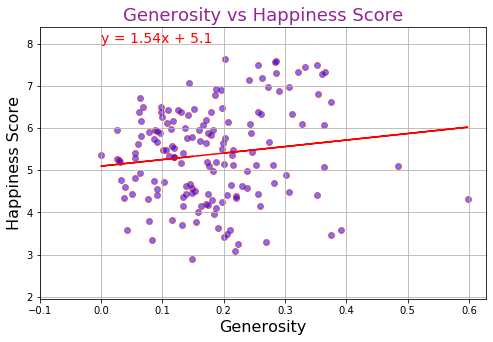

In [468]:
linearRegrassionPlot(data["Generosity"] ,data["Score"], 'Generosity vs Happiness Score', 'Generosity', 'Happiness Score')
                


In [496]:
data.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


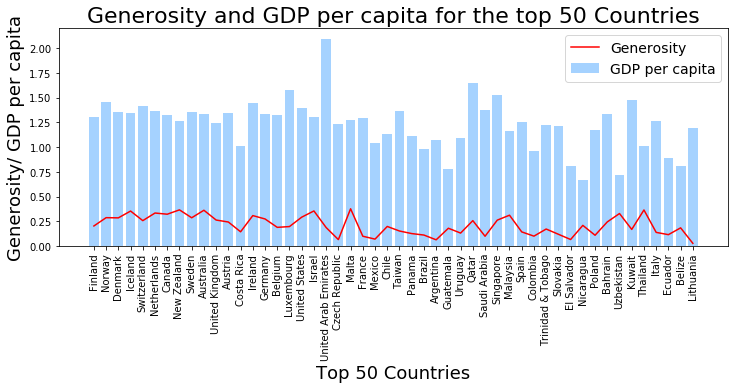

In [508]:
# Prepare Data
data = pd.read_csv("2018.csv")
sliced_data = data[0:50]

fig, ax = plt.subplots()
fig.set_size_inches(12,4)

# Plot the charts and apply some styling
plt.plot(sliced_data['Country or region'], sliced_data['Generosity'],  color="red", label="Generosity")
plt.bar(sliced_data['Country or region'], sliced_data['GDP per capita'],  color="dodgerblue", alpha= 0.4, label="GDP per capita")
# plt.plot(sliced_data['Country or region'], sliced_data['Score'],  color="orange", label="Happiness Score")


# Set x axis and tick locations
x_axis = np.arange(len(sliced_data['Country or region']))
tick_locations = [value for value in x_axis]



plt.xticks(tick_locations, sliced_data['Country or region'], rotation="vertical")


# Add labels to X and Y axes :: Add title
plt.title("Generosity and GDP per capita for the top 50 Countries", fontsize=22)
plt.xlabel("Top 50 Countries", fontsize=18)
plt.ylabel("Generosity/ GDP per capita", fontsize=18)

plt.legend(bbox_to_anchor=(1, 1),fontsize=14 )

plt.show()

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
import gmaps
import os
from scipy.stats import linregress

# Import API key
from api_keys import g_key
from api_keys import weather_api_key

# Configure gmaps
gmaps.configure(api_key=g_key)



In [202]:
api_df = pd.read_csv("2019.csv")
api_top_20 = api_df[0:21]
api_top_20['Lat'] = np.nan
api_top_20['Lng'] = np.nan
api_top_20

/Users/Lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Lat,Lng
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,NaN,NaN
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,NaN,NaN
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,NaN,NaN
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,NaN,NaN
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,NaN,NaN
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,NaN,NaN
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,NaN,NaN
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,NaN,NaN
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,NaN,NaN
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,NaN,NaN


In [203]:
api_top_20.loc[api_top_20['Country or region'] == 'Finland', 'Lat'] = 61.92411
api_top_20.loc[api_top_20['Country or region'] == 'Finland', 'Lng'] = 25.748151

api_top_20.loc[api_top_20['Country or region'] == 'Denmark', 'Lat'] = 56.26392
api_top_20.loc[api_top_20['Country or region'] == 'Denmark', 'Lng'] = 9.501785

api_top_20.loc[api_top_20['Country or region'] == 'Norway', 'Lat'] = 60.472024
api_top_20.loc[api_top_20['Country or region'] == 'Norway', 'Lng'] = 8.468946

api_top_20.loc[api_top_20['Country or region'] == 'Iceland', 'Lat'] = 64.963051
api_top_20.loc[api_top_20['Country or region'] == 'Iceland', 'Lng'] = -19.020835

api_top_20.loc[api_top_20['Country or region'] == 'Netherlands', 'Lat'] = 52.132633
api_top_20.loc[api_top_20['Country or region'] == 'Netherlands', 'Lng'] = 5.291266

api_top_20.loc[api_top_20['Country or region'] == 'Switzerland', 'Lat'] = 46.818188
api_top_20.loc[api_top_20['Country or region'] == 'Switzerland', 'Lng'] = 8.227512

api_top_20.loc[api_top_20['Country or region'] == 'Sweden', 'Lat'] = 60.128161
api_top_20.loc[api_top_20['Country or region'] == 'Sweden', 'Lng'] = 18.643501

api_top_20.loc[api_top_20['Country or region'] == 'New Zealand', 'Lat'] = -40.900557
api_top_20.loc[api_top_20['Country or region'] == 'New Zealand', 'Lng'] =174.885971

api_top_20.loc[api_top_20['Country or region'] == 'Canada', 'Lat'] = 56.130366
api_top_20.loc[api_top_20['Country or region'] == 'Canada', 'Lng'] = -106.346771

api_top_20.loc[api_top_20['Country or region'] == 'Austria', 'Lat'] = 47.516231
api_top_20.loc[api_top_20['Country or region'] == 'Austria', 'Lng'] = 14.550072

api_top_20.loc[api_top_20['Country or region'] == 'Australia', 'Lat'] = -25.274398
api_top_20.loc[api_top_20['Country or region'] == 'Australia', 'Lng'] = 133.775136

api_top_20.loc[api_top_20['Country or region'] == 'Costa Rica', 'Lat'] = 9.748917
api_top_20.loc[api_top_20['Country or region'] == 'Costa Rica', 'Lng'] = -83.753428

api_top_20.loc[api_top_20['Country or region'] == 'Israel', 'Lat'] = 31.046051
api_top_20.loc[api_top_20['Country or region'] == 'Israel', 'Lng'] = 34.851612

api_top_20.loc[api_top_20['Country or region'] == 'Luxembourg', 'Lat'] = 49.815273
api_top_20.loc[api_top_20['Country or region'] == 'Luxembourg', 'Lng'] = 6.129583

api_top_20.loc[api_top_20['Country or region'] == 'United Kingdom', 'Lat'] = 55.378051
api_top_20.loc[api_top_20['Country or region'] == 'United Kingdom', 'Lng'] = -3.435973

api_top_20.loc[api_top_20['Country or region'] == 'Ireland', 'Lat'] = 53.41291
api_top_20.loc[api_top_20['Country or region'] == 'Ireland', 'Lng'] = -8.24389

api_top_20.loc[api_top_20['Country or region'] == 'Germany', 'Lat'] = 51.165691
api_top_20.loc[api_top_20['Country or region'] == 'Germany', 'Lng'] = 10.451526

api_top_20.loc[api_top_20['Country or region'] == 'Belgium', 'Lat'] = 50.503887
api_top_20.loc[api_top_20['Country or region'] == 'Belgium', 'Lng'] = 4.469936

api_top_20.loc[api_top_20['Country or region'] == 'United States', 'Lat'] = 37.09024
api_top_20.loc[api_top_20['Country or region'] == 'United States', 'Lng'] = -95.712891

api_top_20.loc[api_top_20['Country or region'] == 'Czech Republic', 'Lat'] = 49.817492
api_top_20.loc[api_top_20['Country or region'] == 'Czech Republic', 'Lng'] = 15.472962

api_top_20.loc[api_top_20['Country or region'] == 'United Arab Emirates', 'Lat'] = 23.424076
api_top_20.loc[api_top_20['Country or region'] == 'United Arab Emirates', 'Lng'] = 53.847818


api_top_20

/Users/Lina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Lat,Lng
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,61.924110,25.748151
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,56.263920,9.501785
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,60.472024,8.468946
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,64.963051,-19.020835
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52.132633,5.291266
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,46.818188,8.227512
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,60.128161,18.643501
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,-40.900557,174.885971
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,56.130366,-106.346771
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,47.516231,14.550072


In [204]:
lat=39.7391536
lng=-104.9847034
    

#  requests the elevation for Denver, Colorado, the "Mile High City", in JSON format:
base_url = f"https://maps.googleapis.com/maps/api/elevation/json?locations={lat},{lng}&key={g_key}"

# make request 
res = requests.get(base_url).json()

print(res['results'][0]['elevation'])

1608.637939453125


In [205]:

# Use the lat/lng we recovered to identify countries
for index, row in api_top_20.iterrows():
    
    # get lat, lng from df
    lat = row["Lat"]
    lng = row["Lng"]

    # Base Url
    base_url = f"https://maps.googleapis.com/maps/api/elevation/json?locations={lat},{lng}&key={g_key}"


    # make request 
    res = requests.get(base_url).json()
    
    
    try:
        elevation = res['results'][0]['elevation']
        api_top_20.loc[index, 'Elevation'] = elevation
        
     
    except (KeyError, IndexError):
        print(row['Country or region'], lat, lng)
        print("Missing field/result... skipping.")
        
# print("------------------------")
    

/Users/Lina/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)


In [206]:
api_top_20


# api_df = api_df.dropna(axis=0, how='any')
# api_df.shape
below_sea_level=api_top_20.loc[api_top_20['Elevation']< 0]
below_sea_level

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Lat,Lng,Elevation
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.33,0.38,-40.900557,174.885971,-0.223046


In [207]:
#  -0.2230459004640579 is not a valid weight. Weights must be non-negative.
api_top_20.loc[api_top_20['Country or region'] == 'New Zealand', 'Elevation'] = 0.0
api_top_20['Elevation'] =round(api_top_20['Elevation'], 0)
api_top_20['Elevation'] = api_top_20['Elevation'].astype(int)
api_top_20

/Users/Lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/Lina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Lat,Lng,Elevation
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393,61.924110,25.748151,174
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410,56.263920,9.501785,51
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,60.472024,8.468946,756
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118,64.963051,-19.020835,822
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,52.132633,5.291266,37
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343,46.818188,8.227512,1504
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,60.128161,18.643501,13
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380,-40.900557,174.885971,0
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,56.130366,-106.346771,469
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,47.516231,14.550072,1166


In [290]:
# Plot markers on top of the heatmap.
# Store latitude and longitude in locations
locations = api_top_20[["Lat", "Lng"]]

# Store humidity as the weight and convert to float
weight = api_top_20["Elevation"].astype(float)
max_intensety = api_top_20["Elevation"].max().astype(float)

# Setting the zoom level and map center explicitly:
map_center_coordinates = (api_top_20.iloc[0, 9], api_top_20.iloc[0, 10])

# Plot Heatmap
fig = gmaps.figure(center=map_center_coordinates, zoom_level=2)

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights=weight, 
                                 dissipating=False, max_intensity=max_intensety,
                                 point_radius=5)

# make the heatmap transparent
heat_layer.opacity = 0.7


# NOTE: Do not change any of the code in this cell

# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>


<dt>Country</dt><dd>{Country or region}</dd>
<dt>Elevation</dt><dd>{Elevation}</dd>
<dt>Happiness Rank</dt><dd>{Overall rank}</dd>


</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
countries_info = [info_box_template.format(**row) for index, row in  api_top_20.iterrows()]



# Add marker layer ontop of heat map
marker_layer = gmaps.marker_layer(locations, info_box_content=countries_info)


# Display Map
# Add layer
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)


# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [291]:
# Function to create Linear Regression plots

def linearRegrassionPlot(x_values, y_values, title, xlabel , ylabel, fileName = ''):

        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept

        line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'

        plt.scatter(x_values,y_values, marker="o", facecolors="b", edgecolors="r", alpha=0.55, s=100)
        plt.plot(x_values,regress_values,"r-")
        
        # Creating an extra space on the plot for the equation of the regression line
        plt.annotate(line_eq,(x_values.min() , y_values.max()+ 0.05 * y_values.max()),fontsize=14,color="red")

        # To change the size of your pie chart/figure
        fig = plt.gcf()
        fig.set_size_inches(8,4)

        # Creating a title, x label, and y label 
        plt.title(title, fontsize=18, color='purple', alpha=0.85)
        plt.xlabel(xlabel, fontsize=16)
        plt.ylabel(ylabel, fontsize=16)

        # Create x limits of our scatter plot 
        if x_values.max() > 0:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()-50), x_values.max() + 0.05 * x_values.max())
        else:
            plt.xlim(x_values.min() - np.absolute(0.05 * x_values.min()) - 5, x_values.max() - 0.05 * x_values.max() + 5)

        # Create y limits of our scatter plot
        if y_values.max() > 0:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) , y_values.max() + 0.10 * y_values.max())
        else:
            plt.ylim(y_values.min() - np.absolute(0.05 * y_values.min()) , y_values.max() - 0.10 * y_values.max() + 5)

        print(f"The r-squared is: {rvalue}")
        print(f"The equation of the regression line is: {line_eq}")
        print(f"The p-value is: {pvalue}")

        # Save the plotted figures as .pngs
        plt.savefig(fileName + '.png')

        plt.grid()
        plt.show()

The r-squared is: 0.17069377908209782
The equation of the regression line is: y = 0.0x + 7.18
The p-value is: 0.45943649105670226


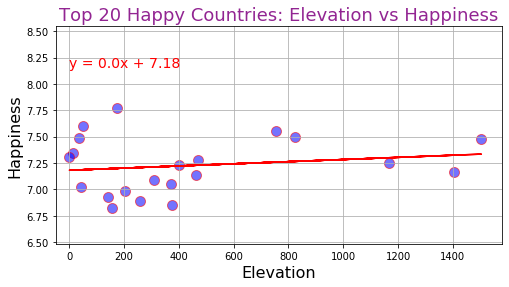

In [292]:
linearRegrassionPlot(api_top_20['Elevation'], api_top_20['Score'], 'Top 20 Happy Countries: Elevation vs Happiness', 'Elevation', 'Happiness', 'Elevation_vs_Happiness')

